In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [ ]:
path = "/content/drive/MyDrive/Silicon Strip"

TASK 1

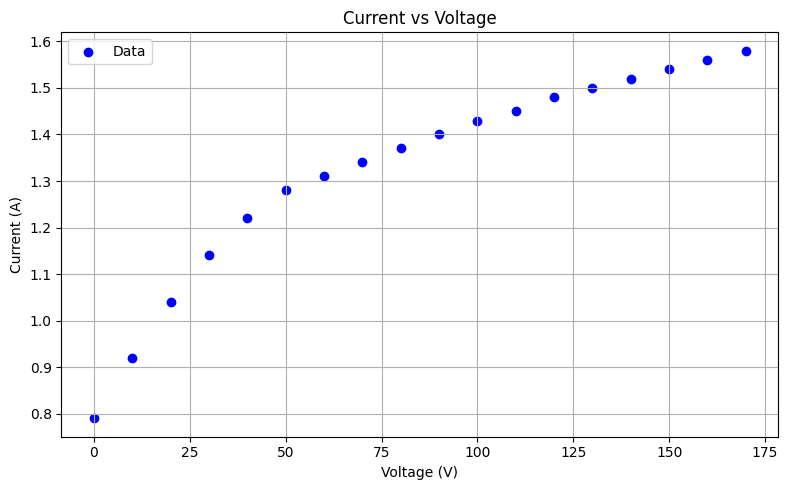

In [ ]:
# Voltage and Current data
V = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
I = [0.79, 0.92, 1.04, 1.14, 1.22, 1.28, 1.31, 1.34, 1.37, 1.40, 1.43, 1.45, 1.48, 1.50, 1.52, 1.54, 1.56, 1.58]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(V, I, marker='o', linestyle='-', color='blue', label='Data')
plt.title("Current vs Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Selecting tha data
V_fit = np.array([60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]).reshape(-1, 1)
I_fit = [1.31, 1.34, 1.37, 1.40, 1.43, 1.45, 1.48, 1.50, 1.52, 1.54, 1.56, 1.58]

model = LinearRegression()
model.fit(V_fit, I_fit)

x_fit = np.linspace(V_fit.min()-20, V_fit.max()+15, 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

In [ ]:
V_fit.min()

np.int64(60)

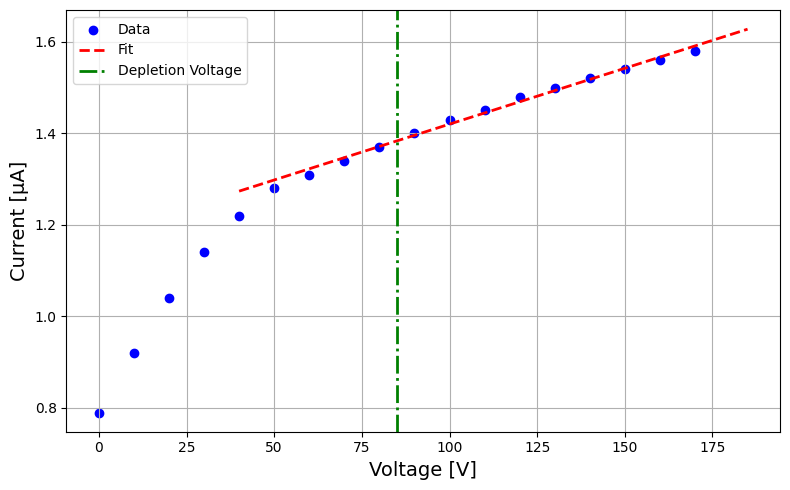

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(V, I, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(x_fit, y_fit, linestyle='--', lw=2, color='Red', label='Fit')

# Add vertical strain line at X = 80
plt.axvline(x=85, color='green', linestyle='-.', linewidth=2, label='Depletion Voltage')

# plt.title("Current vs Voltage")
plt.xlabel("Voltage [V]", fontsize=14)
plt.ylabel("Current [µA]", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("current_vs_voltage.png", dpi=300)
plt.show()


TASK 2: Pedestals and noise

In [ ]:
df_ped = pd.read_csv(path+"/Pedestal.txt", sep=';', usecols=range(0,1000), header=None) #128 chanels and 1000 events
df_ped.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,517.0,518.0,518.0,520.0,515.0,524.0,516.0,518.0,510.0,518.0,...,518.0,519.0,519.0,517.0,520.0,514.0,516.0,511.0,515.0,512.0
1,515.0,514.0,511.0,518.0,514.0,516.0,516.0,515.0,513.0,512.0,...,513.0,510.0,515.0,513.0,514.0,511.0,513.0,508.0,513.0,511.0
2,515.0,513.0,511.0,516.0,517.0,518.0,513.0,515.0,508.0,513.0,...,515.0,518.0,515.0,511.0,514.0,511.0,511.0,510.0,512.0,512.0
3,518.0,515.0,517.0,522.0,521.0,521.0,521.0,522.0,514.0,515.0,...,519.0,517.0,518.0,514.0,522.0,519.0,520.0,514.0,521.0,515.0
4,511.0,512.0,512.0,515.0,515.0,514.0,512.0,512.0,507.0,515.0,...,513.0,510.0,515.0,510.0,516.0,507.0,515.0,509.0,512.0,512.0


In [ ]:
# plt.figure(figsize=(10, 6), dpi=100)

# means = df_ped.iloc[0:129].mean(axis=1)

# # Create x values: i from 0 to 128
# x = range(128)

# # Plot
# plt.scatter(x, means, color='red')
# plt.xlabel("Chanel number (i)")
# plt.ylabel("Pedestal Value")
# plt.title("Pedestal")
# plt.grid(True)
# plt.show()

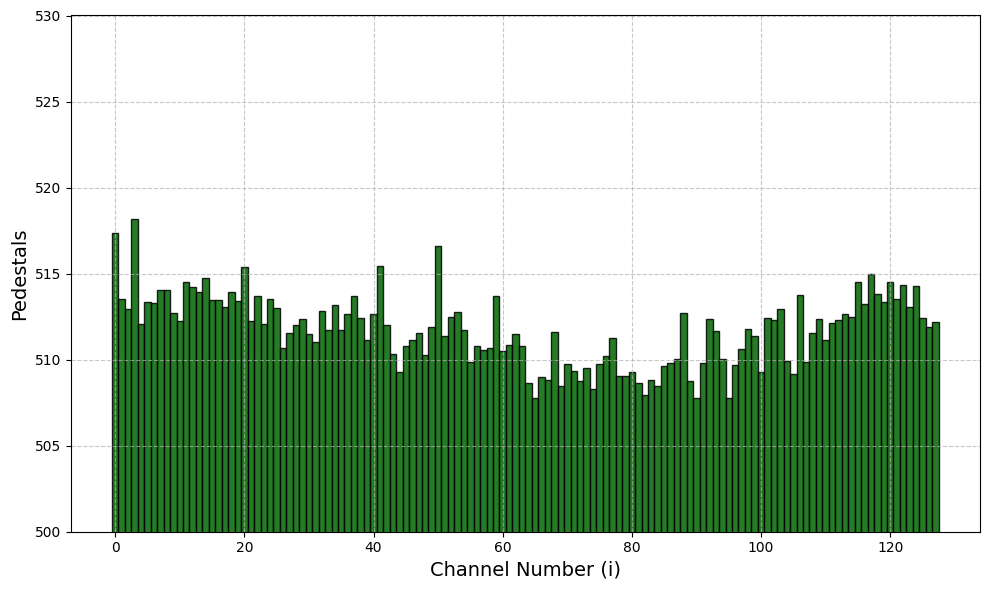

In [ ]:
means = df_ped.iloc[0:129].mean(axis=1)
x = range(128)

plt.figure(figsize=(10, 6), dpi=100)
plt.bar(x, means, color='#006400', edgecolor='black', alpha=0.85, width=1.0)

plt.xlabel("Channel Number (i)", fontsize=14)
plt.ylabel("Pedestals", fontsize=14)
plt.ylim(500, 530)
# plt.title("Pedestal (Histogram Style)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Pedestals.png", dpi=300)
plt.show()

In [ ]:
common_mode = np.zeros(1000)
for k in range(1000):
  tmp = 0
  for i in range(128):
    tmp += (df_ped.iloc[i][k] - df_ped.iloc[i].mean())
  common_mode[k] = tmp/128

In [ ]:
# # Plot
# plt.figure(figsize=(10, 6), dpi=100)
# plt.hist(common_mode, bins=50, color="red", histtype='stepfilled')
# plt.xlabel("Common Mode Value (ADC)", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# # plt.title("Distribution of Common Mode Noise")
# plt.grid(True)
# plt.show()
# print(f'mean:{common_mode.mean():.2f} std:{common_mode.std():.2f}')

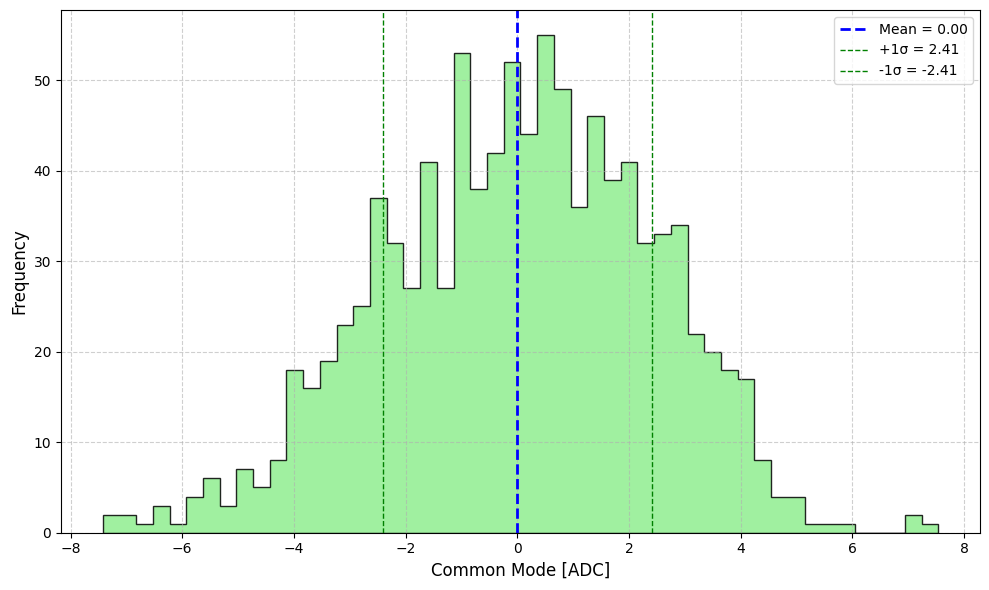

Mean: 0.00  Std: 2.41


In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(common_mode, bins=50, color='#90EE90', edgecolor='black', alpha=0.85, histtype='stepfilled')

# Labels and title
plt.xlabel("Common Mode [ADC]", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# plt.title("Distribution of Common Mode Noise", fontsize=14, fontweight='bold')

mean_val = common_mode.mean()
std_val = common_mode.std()
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=1, label=f'+1σ = {mean_val + std_val:.2f}')
plt.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=1, label=f'-1σ = {mean_val - std_val:.2f}')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Common.png", dpi=300)
plt.show()

print(f'Mean: {mean_val:.2f}  Std: {std_val:.2f}')

In [ ]:
#Noise
noise = np.zeros(128)
for i in range(128):
  tmp = 0
  for k in range(1000):
    tmp += np.pow(df_ped.iloc[i][k]  - df_ped.iloc[i].mean() - common_mode[k] , 2 )
  tmp = np.sqrt( 1/(1000 - 1) * (tmp) )
  noise[i] = tmp

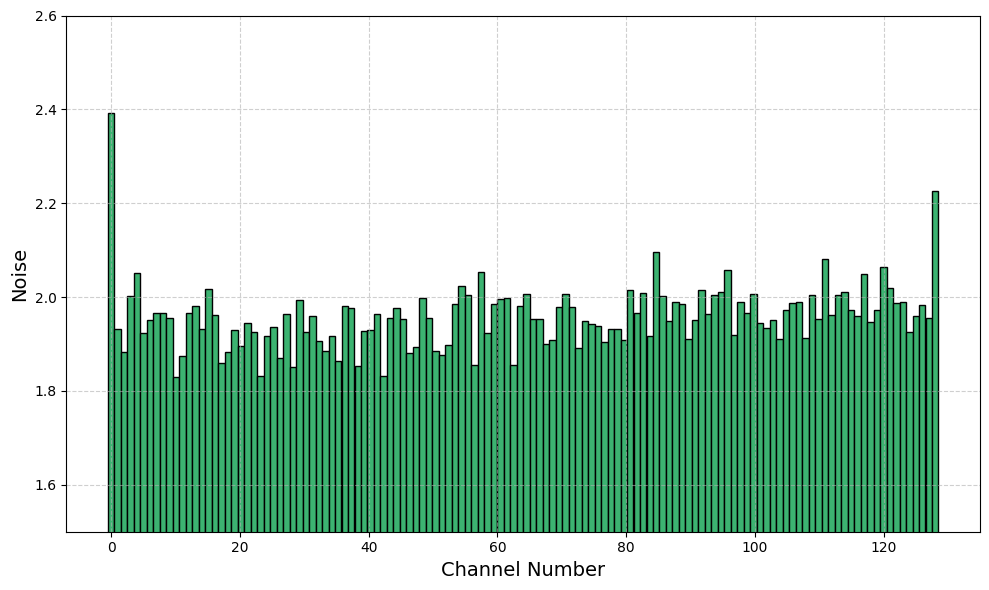

In [ ]:
x = np.linspace(0, 128, 128)

plt.figure(figsize=(10, 6), dpi=100)
plt.bar(x, noise, color='#3CB371', edgecolor='black', width=1.0)

plt.xlabel("Channel Number", fontsize=14)
plt.ylabel("Noise", fontsize=14)
plt.ylim(1.5, 2.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Noise.png", dpi=300)
plt.show()

TASK: Calibration measurements

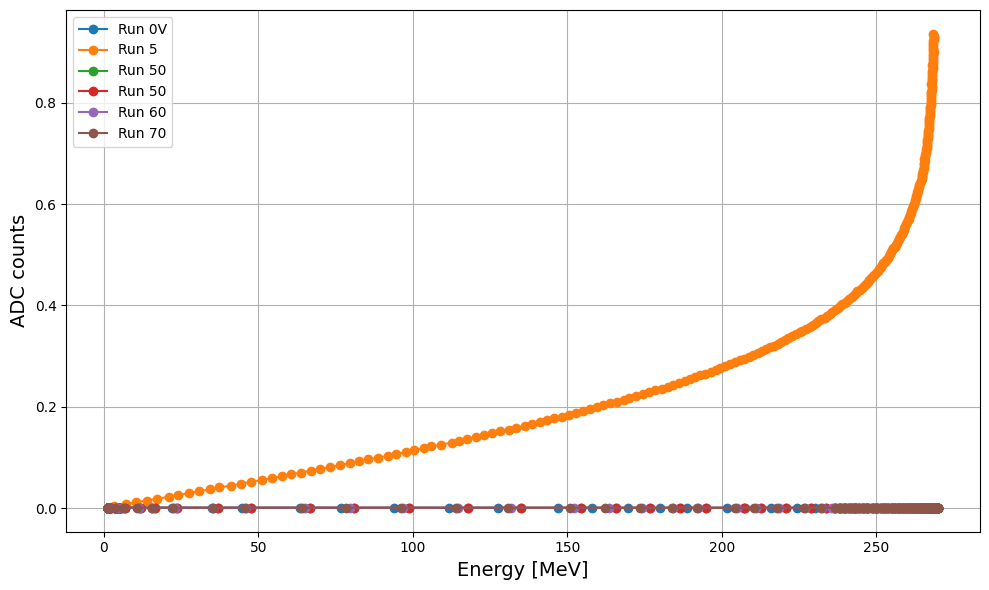

In [ ]:
import os
file_names = ["0V","5" ,"50", "50", "60", "70"]

plt.figure(figsize=(10, 6))

for i, fname in enumerate(file_names):
    file_path = os.path.join('/content/drive/MyDrive/Silicon Strip/Calib/', fname)
    df = pd.read_csv(file_path, delimiter='\t', header=None)
    df = df.iloc[2:].reset_index(drop=True)
    df[0] = df[0].str.replace(',', '.').astype(float)  # X
    df[1] = df[1].str.replace(',', '.').astype(float)  # ADC

    df.columns = ['X', 'Function_0']

    # Plot with time (or whatever X represents) in microseconds
    plt.plot(df['Function_0'], df['X']*3.6e-6, label=f'Run {file_names[i]}', marker='o')

# Plot formatting
plt.xlabel('Energy [MeV]', fontsize=14)
plt.ylabel('ADC counts', fontsize=14)
# plt.title('Electron Energy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Silicon Strip/Calib' + "/5", delimiter='\t', header=None)
print(df.iloc[0])
df = df.iloc[2:].reset_index(drop=True)
df[0] = df[0].str.replace(',', '.').astype(float)
df[1] = df[1].str.replace(',', '.').astype(float)
df.columns = ['X', 'Function_0']
df = df.iloc[2:].reset_index(drop=True)

0    1D 255 -512,000000 260608,000000
1                    [nbin xmin xmax]
Name: 0, dtype: object


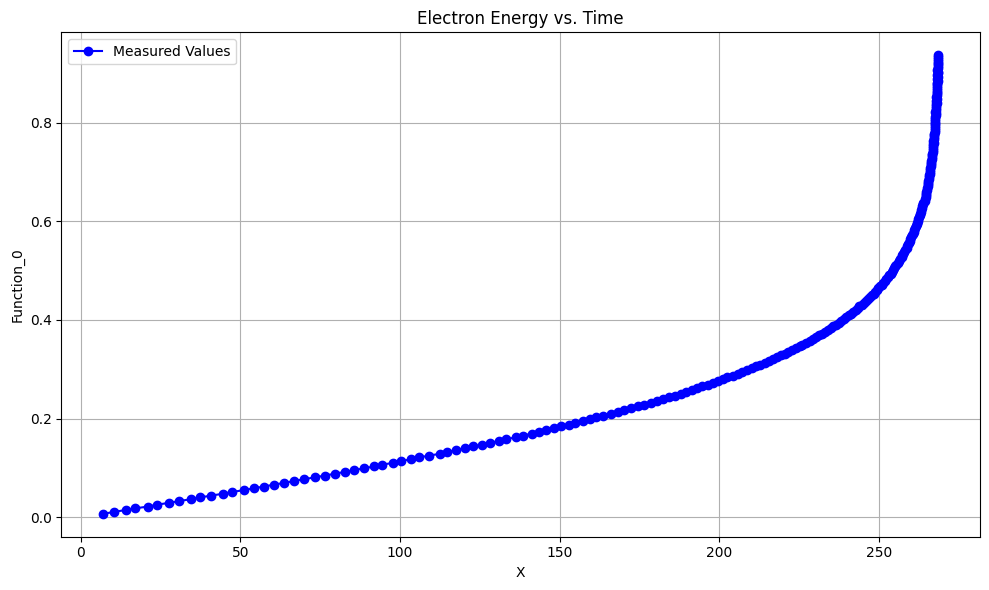

In [ ]:
plt.figure(figsize=(10, 6))
#3.6 eV are needed to generate an electron-hole pair in silicon [Manual Lab]
plt.plot(df['Function_0'], df['X']*3.6e-6, label='Measured Values', marker='o', linestyle='-', color='blue')

# Plot labels and title
plt.xlabel('X')
plt.ylabel('Function_0')
plt.title('Electron Energy vs. Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("current_plot.png", dpi=300)
plt.show()

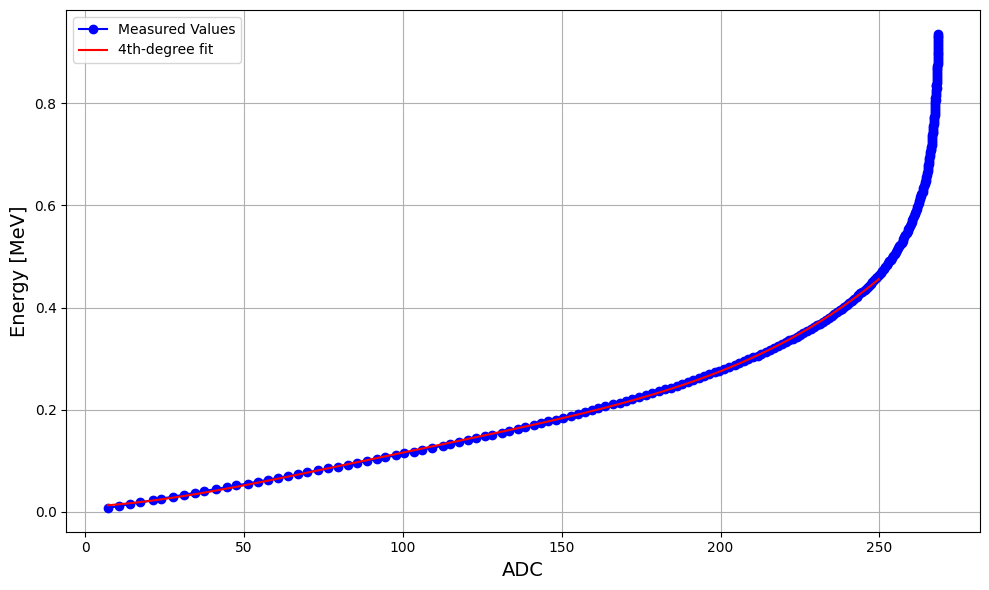

In [ ]:
#Fit 4th degrees polynomil
def poly4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

x_data_full = df['Function_0'].values
y_data_full = df['X'].values * 3.6e-6
mask = (x_data_full >= 0) & (x_data_full <= 250) # we need overfit here
x_data = x_data_full[mask]
y_data = y_data_full[mask]

popt_f, pcov_f = curve_fit(poly4, x_data, y_data)

x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = poly4(x_fit, *popt_f)

plt.figure(figsize=(10, 6))
# plt.scatter(x_data, y_data, color='blue', label='Measured data')
plt.plot(df['Function_0'], df['X']*3.6e-6, label='Measured Values', marker='o', linestyle='-', color='blue')
plt.plot(x_fit, y_fit, color='red', label='4th-degree fit')
plt.xlabel('ADC', fontsize=14)
plt.ylabel('Energy [MeV]', fontsize=14)
# plt.title('ADC (4th-degree fit)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("energy_fit.png", dpi=300)
plt.show()

In [ ]:
popt_f

array([ 1.00600203e-02,  2.73658038e-04,  1.59887025e-05, -1.09079985e-07,
        2.77295065e-10])

6.5 Measuring the strip sensors by using the laser

In [ ]:
laserscan = pd.read_csv(path+'/Laserscan.txt', sep='\t', header=None)

97
98
99
100


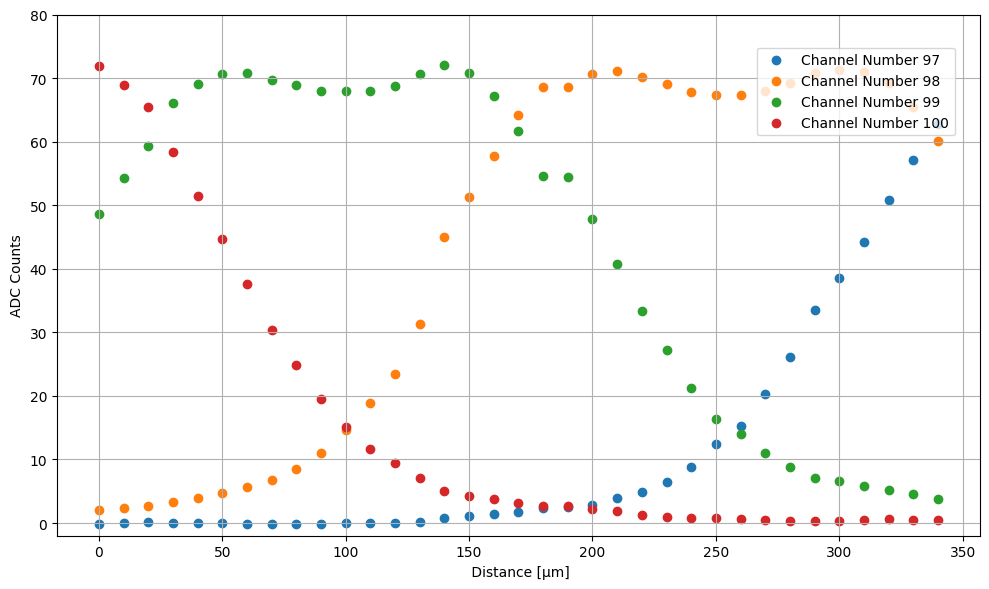

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(128):
  if laserscan[i].mean() > 10:
    print(i)
    plt.scatter(np.linspace(0, 34, laserscan[i].shape[0])*10, laserscan[i], label=f'Channel Number {i}')

plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.95), borderaxespad=0.5)
plt.xlabel(' Distance [µm]')
plt.ylabel('ADC Counts')
plt.ylim(-2, 80)
# plt.title('Laser Scan')
plt.grid(True)
plt.tight_layout()
plt.savefig("strip-scatter.png", dpi=300)
plt.show()

98 vs 100: Intersection at x = 96.07, y = 18.71
97 vs 99: Intersection at x = 257.56, y = 16.33
98 vs 99: Intersection at x = 171.02, y = 58.36
98 vs 99: Intersection at x = 22.48, y = 59.44
--------------------


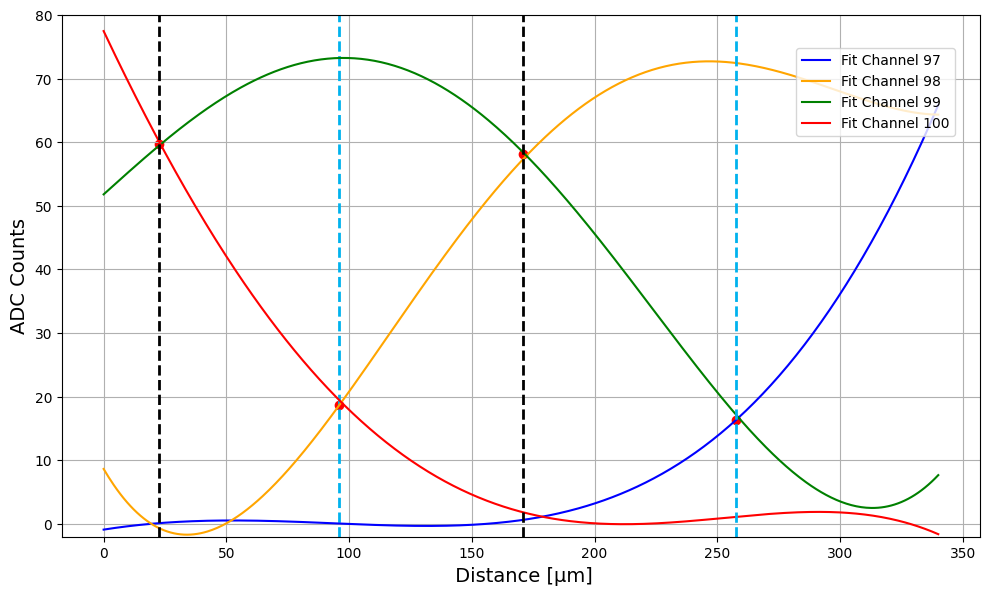

Strip Pitch: 148.5370741482966
Strip Pitch: 161.48296593186376
Mean: 155.01002004008018


In [ ]:
plt.figure(figsize=(10, 6))

x98 = np.array(laserscan[98].index)*10
y98 = np.array(laserscan[98])
x100 = np.array(laserscan[100].index)*10
y100 = np.array(laserscan[100])

popt98, _ = curve_fit(poly4, x98, y98)
popt100, _ = curve_fit(poly4, x100, y100)

x_fit1 = np.linspace(min(min(x98), min(x100)), max(max(x98), max(x100)), 500)
y_fit98 = poly4(x_fit1, *popt98)
y_fit100 = poly4(x_fit1, *popt100)


diff1 = np.abs(y_fit98 - y_fit100)
ind1 = np.where((diff1 > 0) & (diff1 < 1))[0]
x_intersect1 = np.min(x_fit1[ind1])
plt.scatter(x_intersect1, y_fit98[ind1[0]], color='red')
plt.axvline(x=x_intersect1, color='#00B2EE', linestyle='--', linewidth=2, )
print(f"98 vs 100: Intersection at x = {x_intersect1:.2f}, y = {y_fit98[ind1[0]]:.2f}")

# Second pair: 97 vs 99
x97 = np.array(laserscan[97].index)*10
y97 = np.array(laserscan[97])
x99 = np.array(laserscan[99].index)*10
y99 = np.array(laserscan[99])

popt97, _ = curve_fit(poly4, x97, y97)
popt99, _ = curve_fit(poly4, x99, y99)

x_fit2 = np.linspace(min(min(x97), min(x99)), max(max(x97), max(x99)), 500)
y_fit97 = poly4(x_fit2, *popt97)
y_fit99 = poly4(x_fit2, *popt99)


plt.plot(x_fit2, y_fit97, label='Fit Channel 97', color='blue')
plt.plot(x_fit1, y_fit98, label='Fit Channel 98', color='orange')
plt.plot(x_fit2, y_fit99, label='Fit Channel 99', color='green')
plt.plot(x_fit1, y_fit100, label='Fit Channel 100', color='red')



diff2 = np.abs(y_fit97 - y_fit99)
ind2 = np.where((diff2 > 0) & (diff2 < 1))[0]
x_intersect2 = np.min(x_fit2[ind2])
plt.scatter(x_intersect2, y_fit97[ind2[0]], color='red')
plt.axvline(x=x_intersect2, color='#00B2EE', linestyle='--', linewidth=2,  )
print(f"97 vs 99: Intersection at x = {x_intersect2:.2f}, y = {y_fit97[ind2[0]]:.2f}")


diff3 = np.abs(y_fit99 - y_fit98)
ind3 = np.where((diff3 > 0) & (diff3 < 1))[0]
x_intersect3 = np.min(x_fit2[ind3])
plt.scatter(x_intersect3, y_fit99[ind3[1]], color='red')
plt.axvline(x=x_intersect3, color='black', linestyle='--', linewidth=2,)

print(f"98 vs 99: Intersection at x = {x_intersect3:.2f}, y = {y_fit99[ind3[0]]:.2f}")

diff4 = np.abs(y_fit99 - y_fit100)
ind4 = np.where((diff4 > 0) & (diff4 < 1))[0]
x_intersect4 = np.min(x_fit2[ind4])
plt.scatter(x_intersect4, y_fit99[ind4[1]], color='red' )
plt.axvline(x=x_intersect4, color='black', linestyle='--', linewidth=2, )

print(f"98 vs 99: Intersection at x = {x_intersect4:.2f}, y = {y_fit99[ind4[0]]:.2f}")


print('--------------------')
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.95), borderaxespad=0.5)
plt.xlabel(' Distance [µm]', fontsize=14)
plt.ylabel('ADC Counts', fontsize=14)
# plt.title('Curve Intersection of 4th-Degree Fits')
plt.grid(True)
plt.tight_layout()
plt.ylim(-2, 80)
plt.savefig("strip-fit.png", dpi=300)
plt.show()

a = np.abs(x_intersect4 - x_intersect3)
b = np.abs(x_intersect2 - x_intersect1)
print(f'Strip Pitch: {np.abs(x_intersect4 - x_intersect3)}')
print(f'Strip Pitch: {np.abs(x_intersect2 - x_intersect1)}')
print(f'Mean: {(a+b)/2}')

TASK 6: Determination of the Charge Collection Efficiency

In [ ]:
combined_df = pd.DataFrame()

for i in range(0, 201, 10):
    try:
        file_path = '/content/drive/MyDrive/Silicon Strip/CCEL/' f'{i}CCEL.txt'
        col = pd.read_csv(file_path, header=None)
        combined_df[f'V{i}'] = col
    except FileNotFoundError:
        print(f"Missing: {file_path}")

In [ ]:
combined_df.head()

,V0,V10,V20,V30,V40,V50,V60,V70,V80,V90,...,V110,V120,V130,V140,V150,V160,V170,V180,V190,V200
0,-1.161455,-0.495701,-0.360909,-0.296420,-0.200391,-0.043609,0.021574,-0.038349,0.110580,0.178819,...,0.124372,0.294413,0.303672,0.295356,0.358825,0.338665,0.387684,0.449778,0.342463,0.492453
1,-0.212701,-0.015064,0.122879,0.144994,0.086636,0.235864,0.192140,0.249216,0.190320,0.347650,...,0.322283,0.283219,0.325767,0.339179,0.322735,0.363639,0.309592,0.322932,0.378738,0.398664
2,0.159549,0.135622,0.199508,0.252619,0.326071,0.375392,0.362592,0.375718,0.331842,0.486280,...,0.478864,0.348775,0.356263,0.430743,0.346401,0.498241,0.379120,0.346663,0.436429,0.423364
3,0.102094,0.026228,0.072158,0.017286,0.063964,0.092127,0.059337,0.147448,0.092633,0.073148,...,0.181636,0.142511,0.100224,0.129511,0.118086,0.171912,0.073184,0.076394,0.145368,0.107210
4,0.424051,0.323289,0.395202,0.292265,0.330113,0.286229,0.343394,0.290510,0.483513,0.335262,...,0.267836,0.321672,0.213358,0.393603,0.366194,0.334104,0.277072,0.263385,0.409493,0.356196


In [ ]:
# col_sums = combined_df.sum(axis=0)
# normalized_sums = col_sums / col_sums.max()
# labels = [label.lstrip('V') for label in normalized_sums.index]
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(normalized_sums)), normalized_sums, color='#00B2EE', edgecolor='black')

# # plt.title('Normalized Sum of Each Column in combined_df')
# plt.xlabel('Voltage [V]')
# plt.ylabel('Charge Collection Efficiency %')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.xticks(ticks=range(len(normalized_sums)), labels=labels, rotation=90)
# plt.tight_layout()
# plt.show()

In [ ]:
combined_df_source= pd.DataFrame()
for i in range(0, 201, 10):
    file_path = '/content/drive/MyDrive/Silicon Strip/Source Measurement/' f'{i}_Cluster_adc_entries.txt'
    with open(file_path) as f:
      lines = f.readlines()

    data = [line.strip().split('\t') for line in lines if line.strip()]  # Split by tab and remove empty lines
    df = pd.DataFrame(data)
    df = df.iloc[1:].reset_index(drop=True)
    df = df.astype(float)
    df = df.mean(axis=1)
    combined_df_source[f'V{i}'] = df

In [ ]:
col_sums_source = combined_df_source.sum(axis=0)
normalized_sums_source = col_sums_source / col_sums_source.max()

col_sums = combined_df.sum(axis=0)
normalized_sums = col_sums / col_sums.max()
labels = [label.lstrip('V') for label in normalized_sums.index]

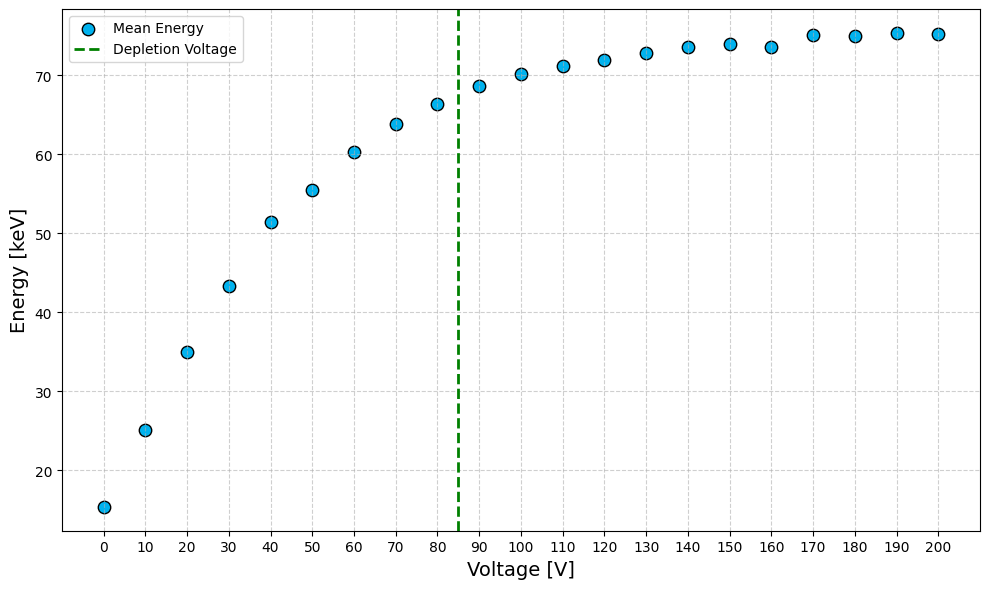

75.415636476971


In [ ]:

mean_energy = poly4(combined_df_source.mean(axis=0), *popt_f)

plt.figure(figsize=(10, 6))
plt.scatter(labels, mean_energy*1000, color='#00B2EE', edgecolors='black', s=80, label='Mean Energy')
plt.axvline(8.5, color='green', linestyle='--', linewidth=2, label= 'Depletion Voltage')
plt.xlabel('Voltage [V]', fontsize=14)
plt.ylabel('Energy [keV]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend()
plt.savefig("mean-cls-source.png", dpi=300)
plt.show()

print(f'{np.max(mean_energy)*1000}')

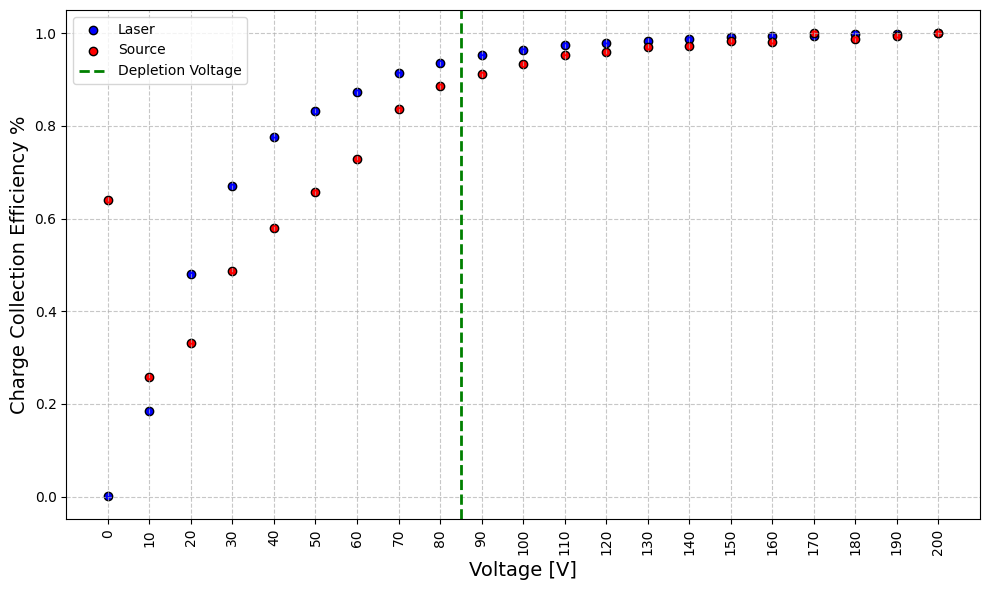

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(normalized_sums)), normalized_sums, color='blue', edgecolor='black', label='Laser')
plt.scatter(range(len(normalized_sums_source)), normalized_sums_source, color='red', edgecolor='black', label='Source')
plt.axvline(8.5, color='green', linestyle='--', linewidth=2, label= 'Depletion Voltage')

# plt.title('Normalized Sum of Each Column')
plt.xlabel('Voltage [V]', fontsize=14)
plt.ylabel('Charge Collection Efficiency %', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7,)

plt.xticks(ticks=range(len(normalized_sums)), labels=labels, rotation=90)

plt.legend()
plt.tight_layout()
plt.savefig("laser-source.png", dpi=300)
plt.show()


a = 173.31940380149666 +/- 38.94821986105478


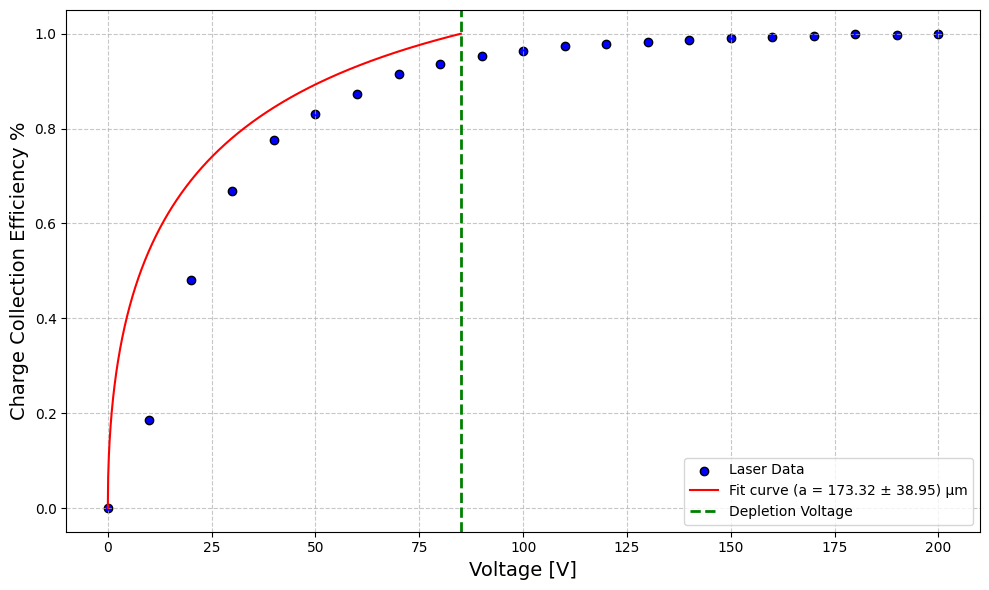

In [ ]:
def fCCE(x, a):
    D = 300
    U_dep = 85
    return (1 - np.exp(-(D * np.sqrt(x/U_dep))/a)) / (1 - np.exp(-D/a))

voltage = np.array(np.array(labels).astype(float))
norm = np.array(normalized_sums )
popt, pcov = curve_fit(fCCE, voltage, norm, bounds=(100, 500))
print('a =', popt[0], '+/-', np.sqrt(pcov[0, 0]))

plt.figure(figsize=(10, 6))
plt.scatter(voltage, norm, color='blue', edgecolor='black', label='Laser Data')
x_plot = np.linspace(0, 85, 1000)
plt.plot(x_plot, fCCE(x_plot, *popt), color='red' ,label=f'Fit curve (a = {popt[0]:.2f} ± {np.sqrt(pcov[0, 0]):.2f}) µm')
plt.axvline(85, color='green', linestyle='--', linewidth=2, label= 'Depletion Voltage')

plt.xlabel('Voltage [V]', fontsize=14)
plt.ylabel('Charge Collection Efficiency %', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("fit-laser.png", dpi=300)
plt.show()

In [ ]:
cls_size = pd.read_csv('/content/drive/MyDrive/Silicon Strip/Source Measurement'+'/cluster_size.txt', header=None)
cls_size = cls_size.iloc[1:].reset_index(drop=True).astype(float)

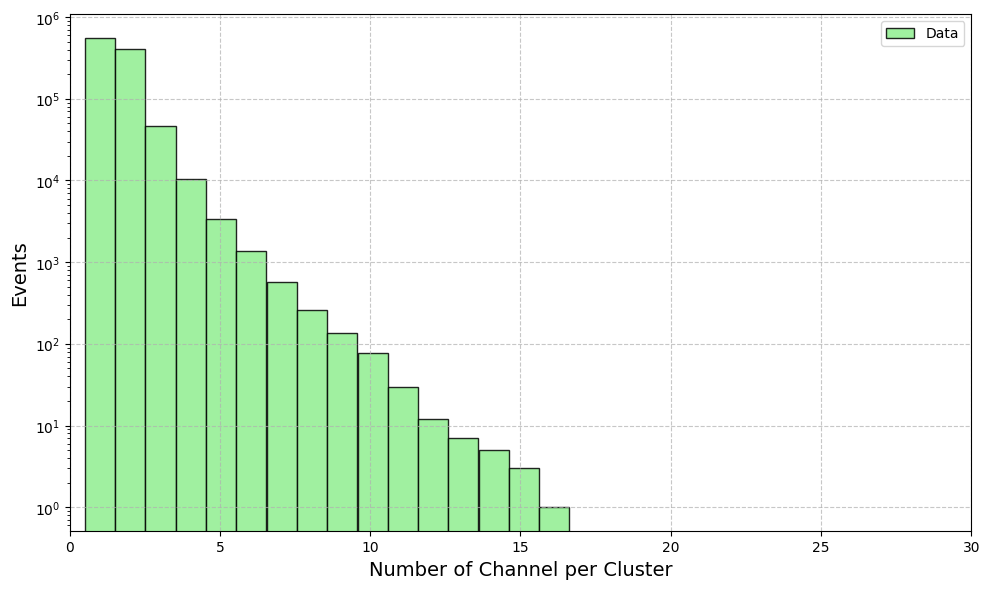

In [ ]:
cls_size = pd.read_csv('/content/drive/MyDrive/Silicon Strip/Source Measurement'+'/cluster_size.txt', header=None)
cls_size = cls_size.iloc[1:].reset_index(drop=True).astype(float)

plt.figure(figsize=(10, 6))
plt.bar(np.linspace(0, cls_size.shape[0], cls_size.shape[0]), cls_size[0], width=1.0, color='#90EE90', edgecolor='black', alpha=0.85, label='Data')
plt.yscale('log')
plt.xlim(0, 30)
plt.xlabel('Number of Channel per Cluster', fontsize=14)
plt.ylabel('Events', fontsize=14)
# plt.title('Cluster Size Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("num-chanel-cls.png", dpi=300)
plt.show()

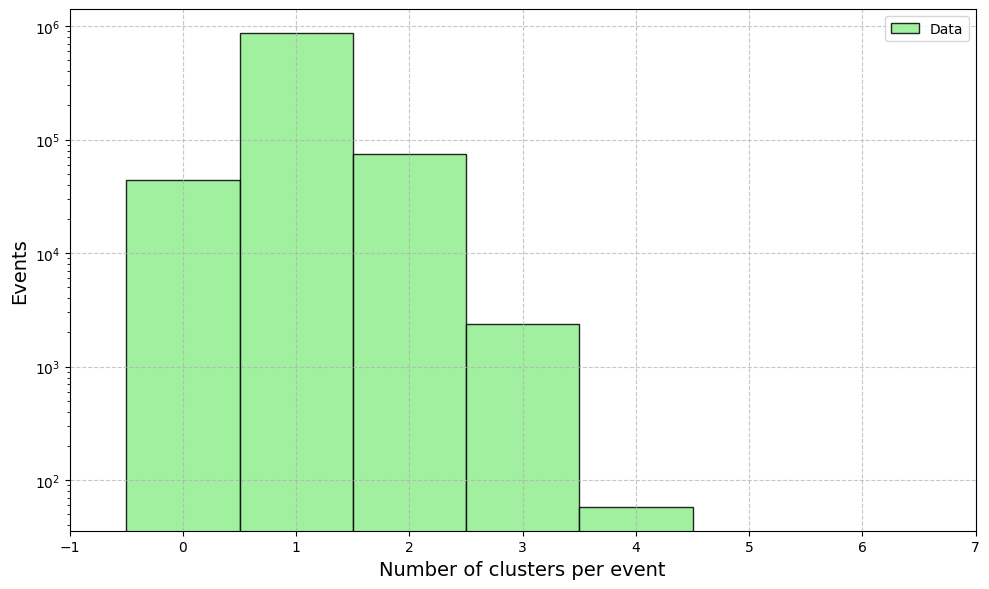

In [ ]:
num_cls = pd.read_csv('/content/drive/MyDrive/Silicon Strip/Source Measurement'+'/number_of_clusters.txt', header=None)
num_cls = num_cls.iloc[1:].reset_index(drop=True)
num_cls = num_cls.astype(float)
num_cls = num_cls.values.reshape(-1)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_cls.shape[0]), num_cls, width=1.0, color='#90EE90', edgecolor='black', alpha=0.85, label='Data')
plt.xlim(-1, 7)
plt.yscale('log')
plt.xlabel('Number of clusters per event', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("cls-event.png", dpi=300)
plt.show()

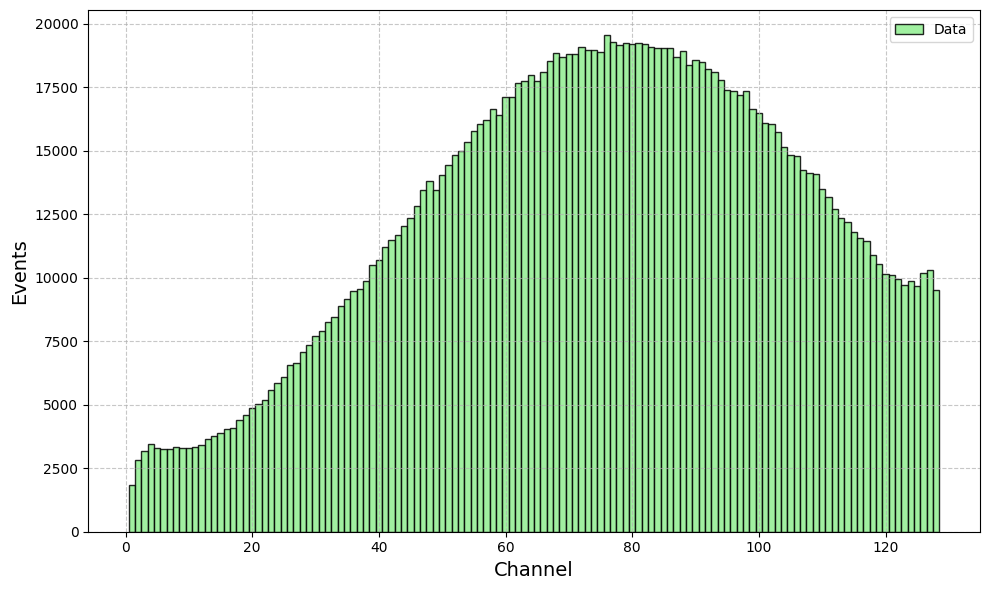

In [ ]:
hitmap = pd.read_csv('/content/drive/MyDrive/Silicon Strip/Source Measurement'+'/hitmap.txt', header=None)
hitmap = hitmap.iloc[1:].reset_index(drop=True)
hitmap = hitmap.astype(float)
hitmap = hitmap.values.reshape(-1)

plt.figure(figsize=(10, 6))
plt.bar(np.linspace(1,hitmap.shape[0],hitmap.shape[0]), hitmap, width=1.0, color='#90EE90', edgecolor='black', alpha=0.85, label='Data')
plt.ylabel('Events', fontsize=14)
plt.xlabel('Channel', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("hitmap.png", dpi=300)
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Silicon Strip/Source Measurement'+'/Cluster_adc_entries.txt', 'r') as file:
    lines = file.readlines()
data = [line.strip().split('\t') for line in lines if line.strip()]
df = pd.DataFrame(data)
df = df.iloc[1:].reset_index(drop=True)
df = df.astype(float)
df = df.sum(axis=1)

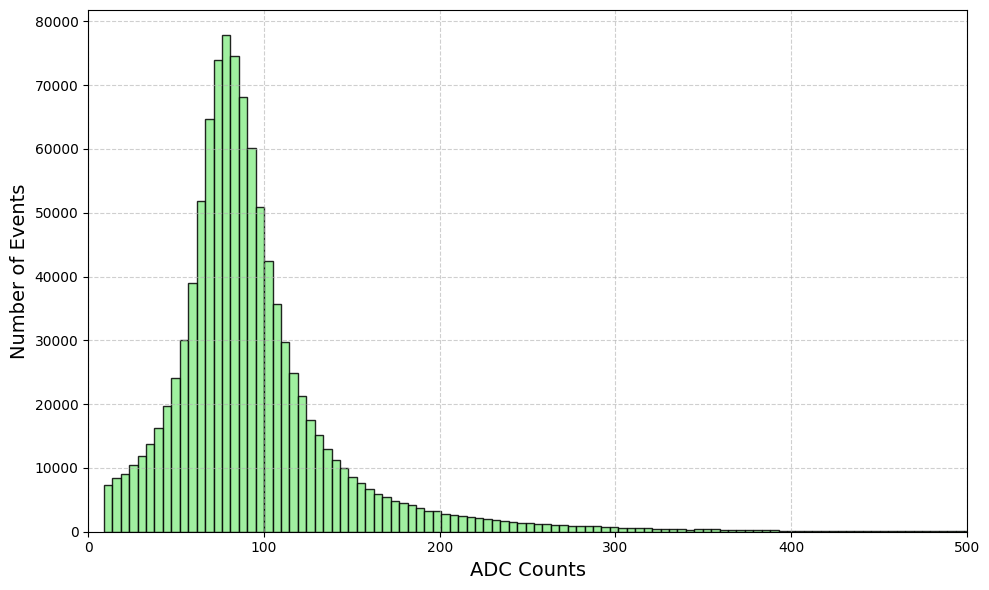

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df, bins=200, color='#90EE90', edgecolor='black', alpha=0.85)

plt.xlabel('ADC Counts', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xlim(0, 500)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("adc-event.png", dpi=300)
plt.show()

In [ ]:
energy = poly4(df, *popt_f)

<ipython-input-39-c216a74d7674>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("energy-event.png", dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


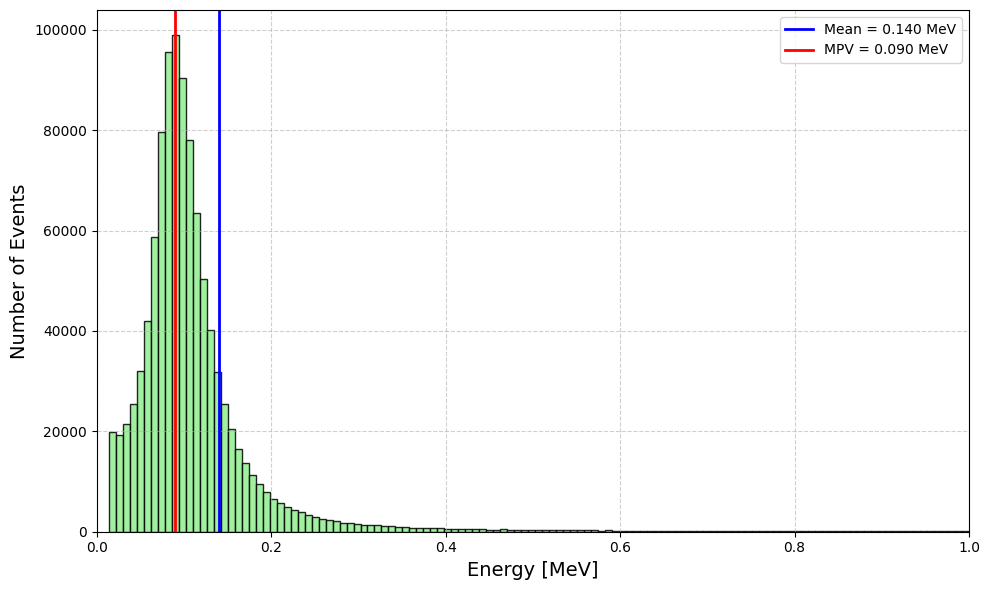

In [ ]:
plt.figure(figsize=(10, 6))

mean_val = np.mean(energy)
counts, bins = np.histogram(energy, bins=20000)
max_bin_index = np.argmax(counts)
mpv = (bins[max_bin_index] + bins[max_bin_index + 1]) / 2

plt.hist(energy, bins=20000, color='#90EE90', edgecolor='black', alpha=0.85,)

plt.axvline(mean_val, color='blue', linestyle='-', linewidth=2, label=f'Mean = {mean_val:.3f} MeV')
plt.axvline(mpv, color='red', linestyle='-', linewidth=2, label=f'MPV = {mpv:.3f} MeV')

plt.xlabel('Energy [MeV]', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("energy-event.png", dpi=300)
plt.show()